# Compare MLP and CNN in FashionMNIST dataset

In [1]:
from tensorflow.keras import datasets
from tensorflow.keras import layers, Model
from tensorflow.keras import Input
import matplotlib.pyplot as plt

In [2]:
%%capture
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

## FashionMNIST with MLP

### Prepare Data 

In [13]:
X_train1 = train_images.reshape(60000, 28*28)
X_test1 = test_images.reshape(10000, 28*28)
X_train1 = X_train1.astype('float32') / 255.
X_test1 = X_test1.astype('float32') / 255.

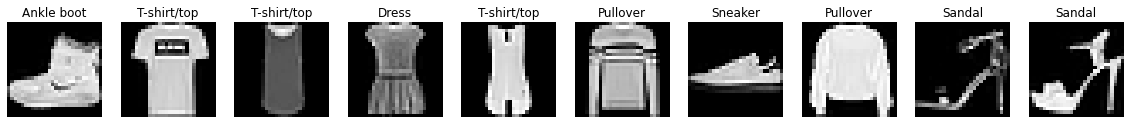

In [14]:
class_names = {0: 'T-shirt/top',
               1: 'Trouser',
               2: 'Pullover',
               3: 'Dress',
               4: 'Coat',
               5: 'Sandal',
               6: 'Shirt',
               7: 'Sneaker',
               8: 'Bag',
               9: 'Ankle boot'}

fig, axes = plt.subplots(1, 10, figsize=(20,2))
for i in range(len(axes)):
  axes[i].imshow(train_images[i], cmap='gray')
  axes[i].set_axis_off()
  axes[i].set_title(class_names[train_labels[i]])

### MLP Model

In [15]:
inp = Input(shape=(784,))
x = layers.Dense(64, activation='relu')(inp)
x = layers.Dense(32, activation='relu')(x)
out = layers.Dense(10, activation='softmax')(x)

model_mlp = Model(inputs=inp, outputs=out)
model_mlp.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_5 (Dense)             (None, 64)                50240     
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


### Train MLP model

In [16]:
model_mlp.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
history1 = model_mlp.fit(X_train1, train_labels,
                         epochs=50, batch_size=512,
                         validation_data=(X_test1, test_labels))

Epoch 1/50
118/118 [==============================] - 1s 5ms/step - loss: 0.8689 - val_loss: 0.5595
Epoch 2/50
118/118 [==============================] - 0s 4ms/step - loss: 0.4832 - val_loss: 0.5036
Epoch 3/50
118/118 [==============================] - 0s 4ms/step - loss: 0.4318 - val_loss: 0.4516
Epoch 4/50
118/118 [==============================] - 0s 4ms/step - loss: 0.4054 - val_loss: 0.4418
Epoch 5/50
118/118 [==============================] - 0s 4ms/step - loss: 0.3826 - val_loss: 0.4262
Epoch 6/50
118/118 [==============================] - 0s 4ms/step - loss: 0.3680 - val_loss: 0.4155
Epoch 7/50
118/118 [==============================] - 0s 3ms/step - loss: 0.3582 - val_loss: 0.4026
Epoch 8/50
118/118 [==============================] - 0s 3ms/step - loss: 0.3445 - val_loss: 0.4115
Epoch 9/50
118/118 [==============================] - 0s 4ms/step - loss: 0.3362 - val_loss: 0.3863
Epoch 10/50
118/118 [==============================] - 0s 4ms/step - loss: 0.3274 - val_loss: 0.3868

### Evaluation of MLP model

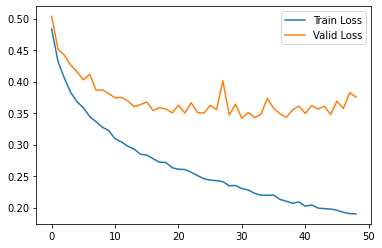

In [18]:
plt.plot(history1.history['loss'][1:], label='Train Loss')
plt.plot(history1.history['val_loss'][1:], label='Valid Loss')
plt.legend()

----------

## FashionMNIST with CNN

### Data Preparation

In [4]:
X_train2 = train_images.astype('float32') / 255.
X_test2 = test_images.astype('float32') / 255.
X_train2.shape

(60000, 28, 28)

### Model Design

In [23]:
inp = Input(shape=(28, 28, 1))
x = layers.Conv2D(16, 3, activation='relu', padding='same')(inp)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(9, 3, activation='relu', padding='same')(x)
x = layers.MaxPool2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(110, activation='relu')(x)
out = layers.Dense(10, activation='softmax')(x)

model_cnn = Model(inputs=inp, outputs=out)
model_cnn.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 9)         1305      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 9)          0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 441)               0   

### Train CNN model

In [24]:
model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
history2 = model_cnn.fit(X_train2, train_labels,
                         epochs=50, batch_size=512,
                         validation_data=(X_test2, test_labels))

Epoch 1/50
118/118 [==============================] - 2s 9ms/step - loss: 0.8853 - val_loss: 0.5331
Epoch 2/50
118/118 [==============================] - 1s 7ms/step - loss: 0.4635 - val_loss: 0.4361
Epoch 3/50
118/118 [==============================] - 1s 7ms/step - loss: 0.3991 - val_loss: 0.4053
Epoch 4/50
118/118 [==============================] - 1s 7ms/step - loss: 0.3705 - val_loss: 0.3740
Epoch 5/50
118/118 [==============================] - 1s 7ms/step - loss: 0.3462 - val_loss: 0.3570
Epoch 6/50
118/118 [==============================] - 1s 7ms/step - loss: 0.3290 - val_loss: 0.3548
Epoch 7/50
118/118 [==============================] - 1s 7ms/step - loss: 0.3180 - val_loss: 0.3382
Epoch 8/50
118/118 [==============================] - 1s 7ms/step - loss: 0.3075 - val_loss: 0.3367
Epoch 9/50
118/118 [==============================] - 1s 7ms/step - loss: 0.2959 - val_loss: 0.3246
Epoch 10/50
118/118 [==============================] - 1s 7ms/step - loss: 0.2865 - val_loss: 0.3163

### Evaluation of CNN model

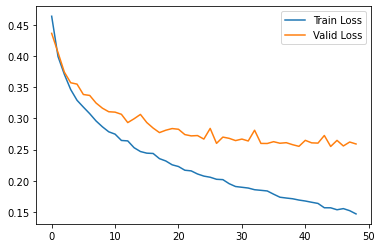

In [25]:
plt.plot(history2.history['loss'][1:], label='Train Loss')
plt.plot(history2.history['val_loss'][1:], label='Valid Loss')
plt.legend()

## Prediction

In [26]:
pred_mlp = model_mlp.predict(X_test1)
pred_cnn = model_cnn.predict(X_test2)

313/313 [==============================] - 1s 2ms/step


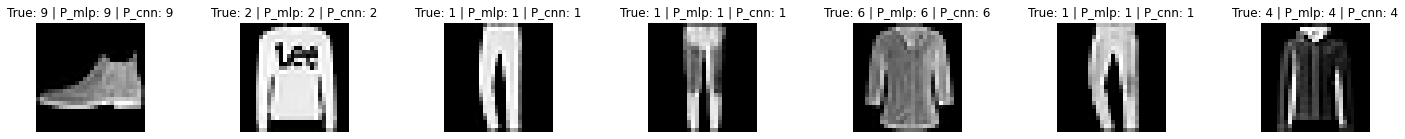

In [36]:
import numpy as np

fig, axes = plt.subplots(1, 7, figsize=(25,2))
for i in range(len(axes)):
  axes[i].imshow(test_images[i], cmap='gray')
  axes[i].set_axis_off()

  title = f'True: {test_labels[i]} | P_mlp: {np.argmax(pred_mlp[i])} | P_cnn: {np.argmax(pred_cnn[i])}'
  axes[i].set_title(title)